# Merging #

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

ets = pd.read_csv('./data/base_etablissement_par_tranche_effectif.csv')
salary = pd.read_csv('./data/net_salary_per_town_categories.csv')
population = pd.read_csv('population.csv', dtype={'CODGEO': 'string'}) #Pour corriger le dtype qui s'affiche en integer par défaut
geo = pd.read_csv('./data/name_geographic_information.csv', dtype={'code_insee': 'string'})

In [2]:
ets.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [3]:
salary.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,SNHMFE14,SNHMFO14,SNHMH14,SNHMHC14,SNHMHP14,SNHMHE14,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,10.1,9.6,15.0,26.4,16.7,11.0,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,10.6,10.0,14.7,23.3,15.8,11.3,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,10.8,9.5,15.3,30.2,17.2,12.4,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,10.3,9.9,13.8,23.0,14.7,13.2,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,10.2,9.8,13.8,24.1,14.4,11.7,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [4]:
population.head()

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,01001,L'Abergement-Clémenciat,11,0,1,15
1,COM,01001,L'Abergement-Clémenciat,11,0,2,15
2,COM,01001,L'Abergement-Clémenciat,11,5,1,20
3,COM,01001,L'Abergement-Clémenciat,11,5,2,20
4,COM,01001,L'Abergement-Clémenciat,11,10,1,20


In [5]:
len(population)

8536584

In [6]:
geo['code_insee_len'] = geo['code_insee'].apply(lambda x: len(x))

In [7]:
#il ya donc 3233 CODGEO avec 4 caractères au lieu de 4. Manque le 0 uniquement ?
geo['code_insee_len'].value_counts()

5    33607
4     3233
Name: code_insee_len, dtype: int64

In [8]:
#Ce ne sont bien que les départements commençant par 0 qui apparaissent dans les codes insee à 4 caractères. C'est donc bien le 0 du code INSEE qui est tronqué
geo[geo['code_insee_len'] == 4]['numéro_département'].value_counts()

02    816
08    464
01    419
07    339
09    332
03    320
04    200
05    177
06    166
Name: numéro_département, dtype: int64

In [9]:
def change_code_insee(x):
    if x['code_insee_len'] == 4:
        return '0'+ x['code_insee']
    else:
        return x['code_insee']
geo['code_insee'] = geo.apply(lambda x: change_code_insee(x), axis=1)

In [10]:
geo = geo.rename(columns={'code_insee': 'CODGEO'})

In [11]:
geo = geo.drop(['code_insee_len'], axis=1)

In [12]:
geo.head()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,CODGEO,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,01024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,01029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,01038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,01040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,01245,46.133333,5.4,1.01


### analyse_CODGEO (avant cleaning) ###

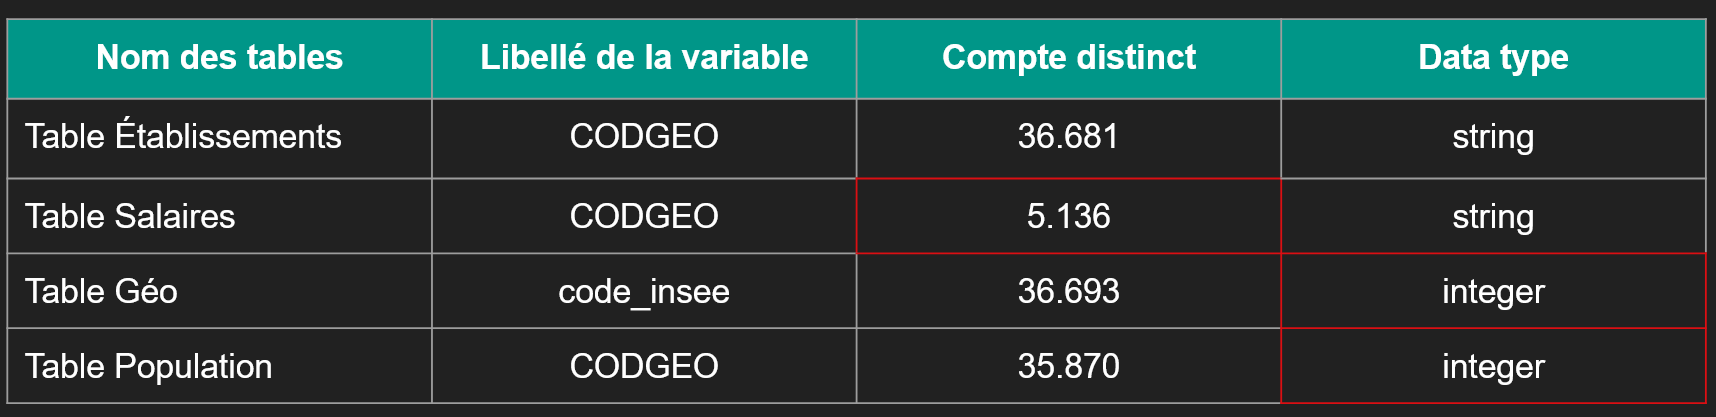

C'est donc dans la table géo qu'on a le plus de CODGEO et qui doit servir de point de départ.

Création de 4 listes de CODGEO, une par table :

In [13]:
import numpy as np
CODGEO_geo = np.array([i for i in geo.CODGEO])
CODGEO_ets = np.array([i for i in ets.CODGEO])
CODGEO_sal = np.array([i for i in salary.CODGEO])
CODGEO_pop = np.array([i for i in population.CODGEO])

### Création d'un dataframe ###

In [14]:
analyse_CODGEO = pd.DataFrame({'CODGEO_geo': CODGEO_geo})

In [15]:
analyse_CODGEO.head()

,CODGEO_geo
0,01024
1,01029
2,01038
3,01040
4,01245


In [19]:

analyse_CODGEO['in ets?'] = analyse_CODGEO['CODGEO_geo'].apply(lambda x: True if x in CODGEO_ets else False)

analyse_CODGEO['in sal?'] = analyse_CODGEO['CODGEO_geo'].apply(lambda x: True if x in CODGEO_sal else False)






"\nanalyse_CODGEO['in pop?'] = analyse_CODGEO['CODGEO_geo'].apply(lambda x: True if x in CODGEO_pop else False)\n"

In [20]:
analyse_CODGEO['in pop?'] = analyse_CODGEO['CODGEO_geo'].apply(lambda x: True if x in CODGEO_pop else False)

In [21]:
analyse_CODGEO.head()

,CODGEO_geo,in ets?,in sal?,in pop?
0,01024,True,True,True
1,01029,True,False,True
2,01038,True,False,True
3,01040,True,False,True
4,01245,True,False,True


In [23]:
analyse_CODGEO['in ets?'].value_counts()

True     36446
False      394
Name: in ets?, dtype: int64

In [24]:
analyse_CODGEO['in sal?'].value_counts()

False    31592
True      5248
Name: in sal?, dtype: int64

In [25]:
analyse_CODGEO['in pop?'].value_counts()

True     35634
False     1206
Name: in pop?, dtype: int64

In [27]:
len(analyse_CODGEO[(analyse_CODGEO['in ets?'] == True) & (analyse_CODGEO['in pop?'] == True)])

35634

In [28]:
len(analyse_CODGEO[(analyse_CODGEO['in ets?'] == True) & (analyse_CODGEO['in pop?'] == True) & (analyse_CODGEO['in sal?'] == True)])

5219

In [ ]:
geo.duplicated().value_counts()

In [ ]:
merged = geo.merge(ets, how='left', on='CODGEO')

In [ ]:
merged2 = merged.merge(salary, how='left', on='CODGEO')

In [ ]:
#merged3 = merged2.merge(population, how='left', on='CODGEO')

In [ ]:
len(merged2)

In [ ]:
merged2.head(50)

In [ ]:
merged2.columns.to_list()

In [ ]:
merged2[pd.isnull(merged2['LIBGEO_x'])][['LIBGEO_x', 'LIBGEO_y']].isna().sum()

In [ ]:
merged2 = merged2.drop(['LIBGEO_y'], axis=1)


In [ ]:
merged2 = merged2.rename(columns={'LIBGEO_x':'LIBGEO'})

In [ ]:
import numpy as np
len(np.unique(merged2.CODGEO))

In [ ]:
len(merged2)

In [ ]:
merged2.duplicated().value_counts()

In [ ]:
no_float = []
for i in merged2.longitude:
    try:
        float(i)
    except:
        no_float.append(i)
print(np.unique(no_float))

In [ ]:
merged2.longitude = merged2.longitude.replace('-', np.nan)

In [ ]:
merged2.longitude = merged2.longitude.str.replace(',', '.')

In [ ]:
merged2.longitude = merged2.longitude.astype(float)

In [ ]:
merged2.isna().sum()

In [ ]:
merged2.E14TST.isna().sum()

In [ ]:
len(merged2)

In [ ]:
merged2 = merged2.dropna(subset=['E14TST']).reset_index(drop=True)

In [ ]:
len(merged2)

In [ ]:
merged2['ets_categorie'] = pd.qcut(merged2['E14TST'], q=[0,0.25,0.50,0.75,1], labels=['quantile 1', 'quantile 2', 'quantile 3', 'quantile 4'])

In [ ]:
merged_ets = merged2[['longitude', 'latitude', 'E14TST', 'ets_categorie']]

In [ ]:
def Gcolor(x):
    if x == 'quantile 1':
        return 230
    elif x == 'quantile 2':
        return 190
    elif x == 'quantile 3':
        return 130
    else:
        return 0
merged_ets['Gcolor'] = merged_ets['ets_categorie'].apply(lambda x: Gcolor(x))

In [ ]:
merged_ets = merged_ets.dropna().reset_index(drop=True)

In [ ]:
len(merged_ets)

In [ ]:
merged_ets.to_csv('merged_ets.csv')

In [ ]:
merged_ets['E14TST'].max()

In [ ]:
merged_ets.head()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 1'].E14TST.min()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 1'].E14TST.max()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 2'].E14TST.min()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 2'].E14TST.max()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 3'].E14TST.min()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 3'].E14TST.max()

In [ ]:
merged_ets[merged_ets['ets_categorie'] == 'quantile 4'].E14TST.min()